# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

### Предобработка данных

In [251]:
#Посмотрим первые 40 строк датафрейма
data.head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [252]:
#выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

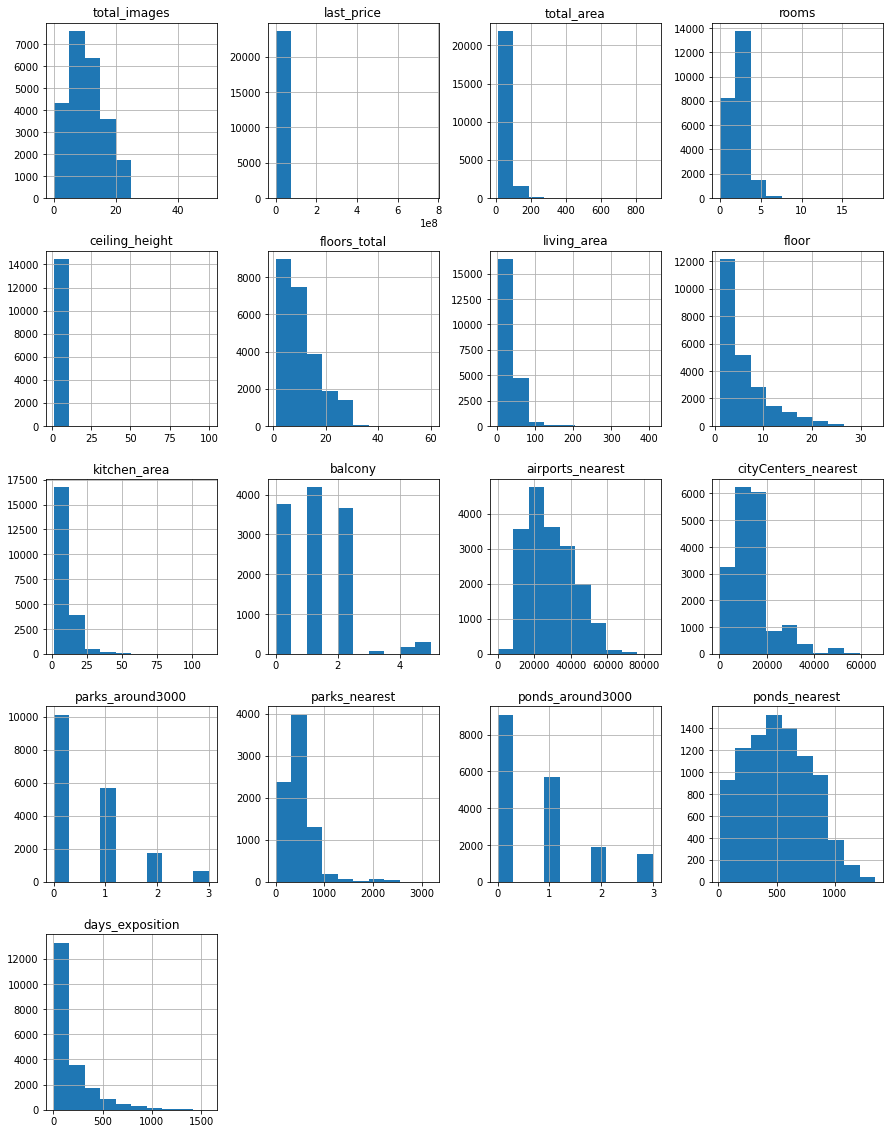

In [253]:
#построим гистограммы для всех числовых столбцов таблицы
data.hist(figsize=(15, 20))

In [254]:
#Проверим есть ли дубликаты и выведем их сумму
data.duplicated().sum()

0

In [255]:
#рассчитаем количественные показатели DataFrame и транспонируем полученную таблицу
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Вывод на основе данных, представленных выше:
1. **last_price** - цена за выставленную недвижимость достаточно сильно варируется, начиная с 12190 руб. за квартиру и заканчивая 763 000 000 руб., что является достаточно большим значением и может повлиять на такие показатели как среднее значение. Минимальное значение неправдоподобно мало, а максимальное вполне допустимо, с условием, что это элитная недвижимость или недвижимость являющаяся историческим объектом.
2. **rooms** - большая часть продажных объявлений предлагают квартиры с числом комнат от 1 до 3. Но есть уникальные предложения, число комнат в которых до 19. Минимальное число комнат обозначено как 0, это может быть ошибкой или квартирой-студией, нужно проверить эти объявления.
3. **celling_height** - какая-то квартира(ы) имеют высоту потолков 1 метр, что вызывает подозрения о правдоподобности данных, максимальная высота потолков для людей - великанов - 100 метров, что также кажется ошибкой в данных, которую стоит проверить и исключить, в случае невозможности это испраить. Почти для половины объявлений не указан этот показатель.
4. **floors_total** - самое высокое здание в СПб имеет 88 этажей, на втором месте здание с 42 этажами. В данных ошибка, так как есть обявление(я), где указано 60 этажей.
5. **living_area** - минимальная жилая площадь равна 2 м² это неправдоподобные данные, такие строки можно удалить.
6. **kitchen_area** - площадь кухни в 1.3 м² невозможна, но людям свойственно ошибаться.
7. **airports_nearest** - в данных либо ошибка, либо значения пропущены, т.к. значение 0 м до аэропорта невозможно.
8. **parks_nearest** - расстояние в 1 метр до парка может быть ложным значением и если таких значений много, то это может негативно сказаться на среднем значении.
9. **days_exposition** - минимальное число дней размещения объявления на площадке странным не выглядит, кому-то могло повезти и квартиру продали за один день или по каким-то другим причинам сняли квартиру с продажи, если таких объявлений много, то это может значительно повлиять на среднее значение. 1580 дней размещения - очень большой срок, переводя в года - это больше 4 лет, такое вполне реально, если оценка стоимости квартиры была неверно проведена или местоположение квартиры не очень удачное, но это также может негативно повлять на среднее.

В некоторых столбцах требуется изменить тип данных<br>
- **last_price:** т.к. цена на момент снятия с публикации квартир определяется целой частью сменим тип данных с float64 на int64
- **first_day_exposition:** является типом данных с данными о дате и времени, сменим его тип на datetime
- **floors_total:** число этажей измеряется целым числом, формат данных этого столбика стоит принять за int64
- **is_apartment:** тип object меняем на булево значение - bool
- **balcony:** меняем тип float64 на int64, т.к. число балконов должно быть целым
- **parks_around3000:** число парков в радиусе 3 км должно быть целым числом, меняем тип с float64 на int64
- **ponds_around3000:** число водоёмов в радиусе 3 км должно быть целым числом, меняем тип с float64 на int64
- **days_exposition:** количество дней, которое было размещено объявление (от публикации до снятия) должно быть целым числом, меняем тип с float64 на int64

In [256]:
#Во многих столбцах имеются пропуски при чем доля их значительна во многих столбцах и требуется заполнение пропусков там, где это возможно
#Взглянем на процент пропусков в каждом из столбцов
data_isna = pd.DataFrame(data.isna().mean().round(4)*100)
data_isna.columns = ['percent_isna']
data_isna

,percent_isna
total_images,0.00
last_price,0.00
total_area,0.00
first_day_exposition,0.00
rooms,0.00
ceiling_height,38.80
floors_total,0.36
living_area,8.03
floor,0.00
is_apartment,88.29


In [257]:
#Посмотрим на количество пропусков в столбцах датафрейма
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 из 22 столбцах имеются пропуски:

1. Столбец **ceiling_height** (высота потолков) имеет 9195 пропусков. Около 39% объявлений имеют пропущенные значения. **Их можно заполнить** медианным значением высоты потолков в зависимости от населенного пункта.
2. **floors_total**: 86 пропусков в колонке с указанием числа этажей в доме. Их количество крайне мало, поэтому **не будем заполнять пропуски**.
3. **living_area**: 1903 пропуска в колонке, где указана жилая площадь в квадратных метрах, это около 8% от общего числа объявлений. К сожалению, заполнить значения не представляется возможным, **оставляем пропуски**.
4. **is_apartment**: 20924 пропуска в колонке с указанием аппартаменты это или нет. Скорее всего люди просто пропускали это поле, если квартира просто жилая. **Эти пропуски можно заполнить нулями (False)**.
5. **kitchen_area**: 2278 пропусков или около 9,5% от общего числа объявлений. Поле не заполнялось скорее всего из-за того, что пользователи не располагали инофрмацией о точном метраже кухни. Значения также нечем заполнить, значит **оставляем пропуски**.
6. **balcony**: 11519 пропусков с информацией о числе балконов. Скорее всего, если балкон в квартире отсутствует, то пользователь пропускает это поле. **Можно заполнить его нулями**.
7. **locality_name**: 49 пропусков. Число пропусков названий населенных пунктов незначительно и не сильно критично для нашего исследования, можно их не заполнять, **осавим пропуски**.
8. **airports_nearest**: 5542 пропусков, вероятно, на картографических данных не отражена информация о некоторых аэропортах, в связи с чем возникли пропуски. Данные заполнить нечем, поэтому оставим пропуски.
9. **city_сenters_nearest**: 5519 пропусков, вероятно, на картографических данных отсутствует некоторая информация, в связи с чем возникли пропуски. Данные **можно заполнить** медианным значением удаленности от центра в зависимости от населенного пункта.
10. **parks_around_3000**: 5518 пропусков равно числу пропусков в столбце ponds_around_3000, в этой связи можно заключить, что ошибка скорее всего техническая. Т.к. данные дополнительные, на результаты исследования они повлиять не должны, **оставим пропуски**.
11. **parks_nearest**: 15620 пропусков, вероятно, на картографических данных отсутствует некоторая информация, в связи с чем возникли пропуски. Данные заполнить нечем, поэтому **оставим пропуски**.
12. **ponds_around_3000**: 5518 пропусков равно числу пропусков в столбце parks_around_3000, в этой связи можно заключить, что ошибка скорее всего техническая. Т.к. данные дополнительные, на результаты исследования они повлиять не должны, **оставим пропуски**.
13. **ponds_nearest**: 14589 пропусков, более 60% строк столбца имеют пропуски информации о расстоянии до ближайшего водоема, вероятно, на картографических данных отсутствует некоторая информация, в связи с чем возникли пропуски. Данные заполнить нечем, поэтому **оставим пропуски**. Они не должны повлиять на конечный результат.
14. **days_exposition**: 3181 пропусков или около 13% объявлений имеют пропуски в данных. Данная информация должна поступать автоматически и скорее всего ошибка также техническая. Данные будут играть важную роль в аналитике датасета, но **заполнить пропуски нечем, так что оставим их**.


In [258]:
#Переименуем некоторые названия столбцов и приведем все к единому стилю

data = data.rename(columns={'cityCenters_nearest': 'city_сenters_nearest',
                            'parks_around3000': 'parks_around_3000',
                            'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [259]:
#Заполним пропуски is_apartment и проверим результат
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].isna().sum()

0

In [260]:
#Заполним пропуски balcony и проверим результат
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

In [261]:
#Заполним пропуски в столбце ceiling_height медианным значением, в зависимости от уникального значения столбца locality_name
for localname in data['locality_name'].unique():
    data.loc[(data['locality_name'] == localname) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == localname), 'ceiling_height'].median()
    
#Дозаполним оставшиеся пустые строки и сделаем проверку
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

0

In [ ]:
#Заполним пропуски в столбце city_сenters_nearest медианным значением, в зависимости от уникального значения столбца locality_name
for localname in data['locality_name'].unique():
    data.loc[(data['locality_name'] == localname) & (data['city_сenters_nearest'].isna()), 'city_сenters_nearest'] = \
    data.loc[(data['locality_name'] == localname), 'city_сenters_nearest'].median()
    
#Оставшиеся пропуски оставляем и проверяем сколько их
data['city_сenters_nearest'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

5394

In [264]:
#Проведем изменение типа данных
data['last_price'] = data['last_price'].astype('int64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['balcony'] = data['balcony'].astype('int64')

Для тех столбцов, в которых планировалось изменить тип данных, но в них остались пропуски оставим формат float64 и не будем менять его на int64 (floors_total, parks_around_3000, ponds_around3000, days_exposition).

In [265]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_сenters_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [266]:
data.duplicated().sum()

0

In [267]:
#Посмотрим на уникальные названия населенных пунктов и попробуем найти неявные дубликаты
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [268]:
data['locality_name_new'] = data['locality_name'].str.lower()
data = data.replace({'locality_name_new':{
    'никольское': 'село никольское',
    'городской посёлок советский': 'посёлок городского типа советский',
    'городской посёлок большая ижора': 'посёлок городского типа большая ижора',
    'городской посёлок лесогорский': 'посёлок городского типа лесогорский',
    'посёлок рябово': 'посёлок городского типа рябово',
    'городской посёлок мга': 'посёлок городского типа мга',
    'городской посёлок павлово': 'посёлок городского типа павлово',
    'городской посёлок назия': 'посёлок городского типа назия',
    'коттеджный посёлок лесное': 'посёлок лесное',
    'мурино': 'посёлок мурино',
    'любань': 'посёлок любань',
    'городской посёлок рощино': 'посёлок городского типа рощино',
    'деревня кудрово': 'кудрово'
}
                    })
data['locality_name_new'] = data['locality_name_new'].str.replace('ё', 'е')
data['locality_name_new'].value_counts()

print(f"Длина первоначального списка уникальных имен населенных пунктов: {len(data['locality_name'].sort_values().unique())} наименований.")
print(f"Длина конечного списка уникальных имен населенных пунктов: {len(data['locality_name_new'].sort_values().unique())} наименований.")

data['locality_name_new'].sort_values().unique()

Длина первоначального списка уникальных имен населенных пунктов: 365 наименований.
Длина конечного списка уникальных имен населенных пунктов: 320 наименований.


array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок новоселье', 'городской поселок свирьстрой',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'деревня гостилицы',
       'деревня заклинье', 'деревня заневка', 'деревня зимитицы',
       'деревня извара', 'деревня иссад', 'деревня калитино',
       'деревня кальтино', 'деревня камышовка', 'де

In [269]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.733877
std          1.009388
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [270]:
len(data['ceiling_height'].unique())

195

In [271]:
data['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,
         2.59 ,   2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,
         2.63 ,   2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,
         2.68 ,   2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,
         2.74 ,   2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,
         2.81 ,   2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,
         2.88 ,   2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,   2.94 ,
         2.95 ,   2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,   3.01 ,
         3.02 ,   3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,   3.08 ,
         3.09 ,   3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,   3.15 ,
         3.16 ,   3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,   3.23 ,
         3.24 ,   3.

In [272]:
data['ceiling_height'].sort_values().value_counts()

2.70     7974
2.50     4160
2.60     2136
2.55     1572
2.75     1121
         ... 
8.30        1
10.30       1
4.14        1
3.39        1
4.65        1
Name: ceiling_height, Length: 195, dtype: int64

<AxesSubplot:>

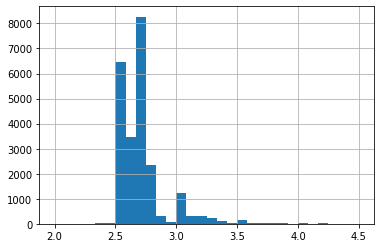

In [273]:
data['ceiling_height'].hist(range=(2, 4.5), bins=30)

<AxesSubplot:>

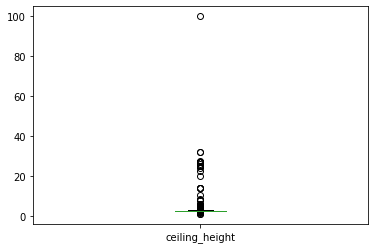

In [274]:
data['ceiling_height'].plot.box()

На графиках явно выбиваются из общего ряда значения с потолками выше 20 метров и отдельное внимание приковывает значение в 100 метров, также неверными кажутся предложения в которых высота потолка ниже 2 метров. Значений меньше 2 метров не так много, трогать эти строки не будем, т.к. они могут содержать правильные данные в остальных столбцах и если их оставить большого влияния на исследование не окажут. А значения высоты потолков от 20 до 32 метров логичнее заменить вещественными значениями в диапозоне от 2.0 м до 3.2 м. Значение потолка в 100 метров удалим, оно будет мешать при расчетах и построениях графиков.

In [275]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] / 10
data = data.drop(data[data['ceiling_height'] == 100].index) 

data['ceiling_height'].sort_values().unique()

array([ 1.   ,  1.2  ,  1.75 ,  2.   ,  2.2  ,  2.25 ,  2.26 ,  2.3  ,
        2.34 ,  2.4  ,  2.45 ,  2.46 ,  2.47 ,  2.48 ,  2.49 ,  2.5  ,
        2.51 ,  2.515,  2.52 ,  2.525,  2.53 ,  2.54 ,  2.55 ,  2.555,
        2.56 ,  2.56 ,  2.57 ,  2.575,  2.58 ,  2.59 ,  2.6  ,  2.6  ,
        2.61 ,  2.615,  2.62 ,  2.625,  2.63 ,  2.64 ,  2.65 ,  2.65 ,
        2.66 ,  2.67 ,  2.675,  2.68 ,  2.69 ,  2.7  ,  2.71 ,  2.72 ,
        2.725,  2.73 ,  2.74 ,  2.75 ,  2.76 ,  2.77 ,  2.78 ,  2.79 ,
        2.8  ,  2.81 ,  2.82 ,  2.83 ,  2.84 ,  2.85 ,  2.86 ,  2.87 ,
        2.88 ,  2.89 ,  2.9  ,  2.91 ,  2.92 ,  2.93 ,  2.94 ,  2.95 ,
        2.96 ,  2.97 ,  2.98 ,  2.99 ,  3.   ,  3.01 ,  3.02 ,  3.03 ,
        3.04 ,  3.05 ,  3.06 ,  3.07 ,  3.08 ,  3.09 ,  3.1  ,  3.11 ,
        3.12 ,  3.13 ,  3.14 ,  3.15 ,  3.16 ,  3.17 ,  3.18 ,  3.2  ,
        3.21 ,  3.22 ,  3.23 ,  3.24 ,  3.25 ,  3.26 ,  3.27 ,  3.28 ,
        3.29 ,  3.3  ,  3.31 ,  3.32 ,  3.33 ,  3.34 ,  3.35 ,  3.36 ,
      

In [276]:
data['ceiling_height'].describe()

count    23698.000000
mean         2.706906
std          0.282117
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

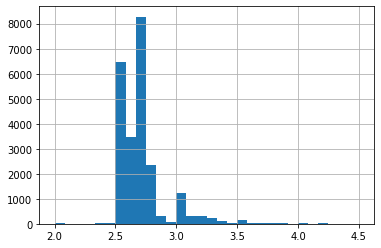

In [277]:
data['ceiling_height'].hist(range=(2, 4.5), bins=30)

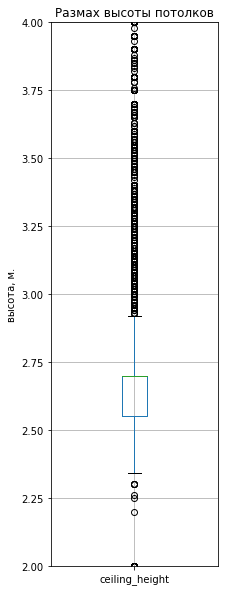

In [278]:
data['ceiling_height'].plot.box(figsize=(3,10))
plt.title("Размах высоты потолков")
plt.ylim(2,4)
plt.ylabel('высота, м.')
plt.grid(True)


In [279]:
data = data.drop(data[data['floors_total'] >= 42.0].index)

**На шаге предобработки:**

- выявили пропуски в данных.
- изменили тип некоторых данных.
- привели названия столбцов к единому стилю.
- заполнили пропуски в некоторых столбцах, где это показалось возможным.
- выявили и устранили неявные дубликаты.

### Посчитайте и добавьте в таблицу новые столбцы

In [280]:
#Посчитаем и добавим в таблицу данные о стоимости 1 кв.м. квартир
data['price_sq_m'] = data['last_price'] / data['total_area']
data['price_sq_m'] = data['price_sq_m'].round(2)

In [281]:
#Добавим и проверим 2 колонки с днями недели публикации объявления: один с буквенным обозначением, второй - с числовым.
data['day_of_week_exp'] = data['first_day_exposition'].apply(lambda x: x.strftime('%A'))
data['day_of_week_exp_number'] = data['first_day_exposition'].apply(lambda x: x.weekday())

#Добавим колонку с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].apply(lambda x: x.strftime('%m'))
data['year_exposition'] = data['first_day_exposition'].apply(lambda x: x.strftime('%Y'))

#Напишем функцию для определения типа этажа (значения - «первый», «последний», «другой»):
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# применение функции для создания нового столбца 'floor_type'
data['floor_category'] = data.apply(floor_type, axis=1)

data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,locality_name_new,price_sq_m,day_of_week_exp,day_of_week_exp_number,month_exposition,year_exposition,floor_category
14033,2,5675000,55.7,2018-02-02,2,2.7,28.0,31.2,13,False,...,0.0,NaN,238.0,санкт-петербург,101885.10,Friday,4,02,2018,другой
2520,0,2300000,65.0,2017-01-24,3,2.7,5.0,35.0,1,False,...,0.0,NaN,16.0,санкт-петербург,35384.62,Tuesday,1,01,2017,первый
14602,14,8270000,104.4,2017-02-16,4,3.1,5.0,77.0,3,False,...,1.0,537.0,576.0,санкт-петербург,79214.56,Thursday,3,02,2017,другой
7587,7,2800000,33.0,2017-07-27,1,2.6,9.0,17.9,7,False,...,0.0,NaN,99.0,санкт-петербург,84848.48,Thursday,3,07,2017,другой
1944,8,55800000,125.0,2015-12-17,2,3.2,9.0,50.0,2,False,...,1.0,478.0,481.0,санкт-петербург,446400.00,Thursday,3,12,2015,другой


In [282]:
#Создадим колонку, в которой будет отражено расстояние до центра города в километрах.
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] / 1000 
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round()
data.sample(4)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_new,price_sq_m,day_of_week_exp,day_of_week_exp_number,month_exposition,year_exposition,floor_category,city_сenters_nearest_km
2585,14,9490000,94.0,2018-03-13,3,3.40,4.0,67.0,1,False,...,1018.0,380.0,санкт-петербург,100957.45,Tuesday,1,03,2018,первый,5.0
22016,1,13500000,95.0,2019-03-18,3,3.15,6.0,65.0,6,False,...,344.0,42.0,санкт-петербург,142105.26,Monday,0,03,2019,последний,9.0
14591,20,29000000,327.2,2017-11-15,6,2.70,4.0,177.3,4,False,...,194.0,274.0,санкт-петербург,88630.81,Wednesday,2,11,2017,последний,18.0
7561,6,5600000,76.4,2017-12-19,3,2.50,5.0,42.1,3,False,...,NaN,59.0,сосновый бор,73298.43,Tuesday,1,12,2017,другой,NaN


### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_сenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositio

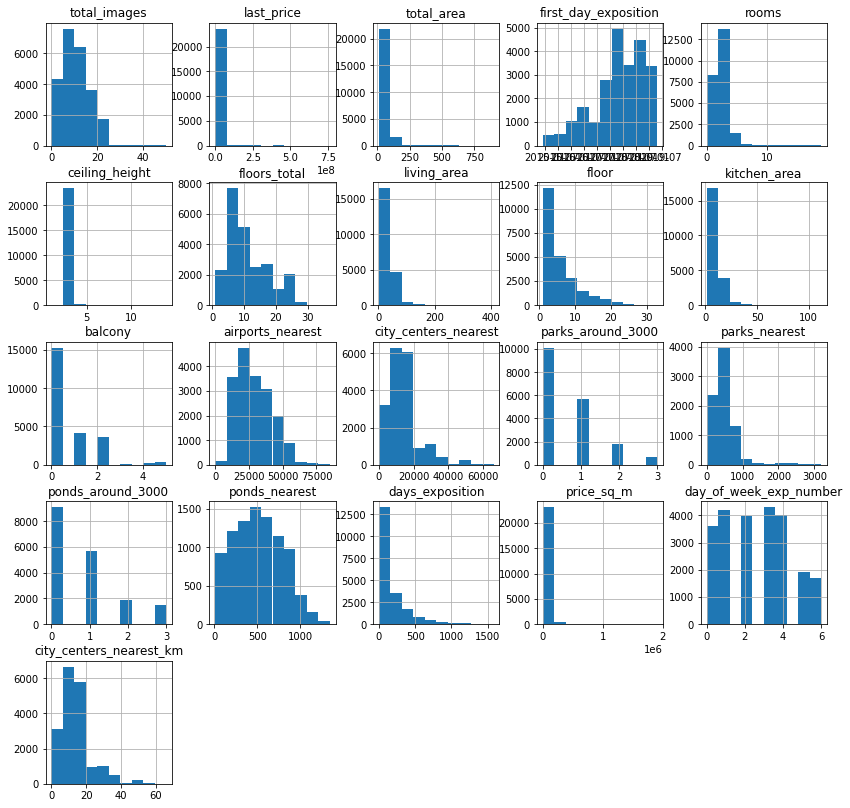

In [283]:
data.hist(figsize=(14, 14))

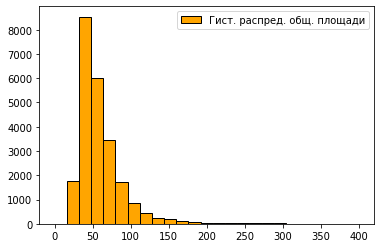

In [284]:
plt.hist(data['total_area'], range=(0, 400),bins=25, color='orange', alpha=1,  ec='black', label='Гист. распред. общ. площади')
plt.legend(loc='best')
plt.show()

**Большая часть недвижимости на рынке это квартиры с общей площадью до 75 $м^2$, при этом около 10000 предложений приходится на квартиры с площадью до 50 $м^2$. Больших квартир с общей площадью более 100$м^2$ на рынке среди предложений значительно меньше.**

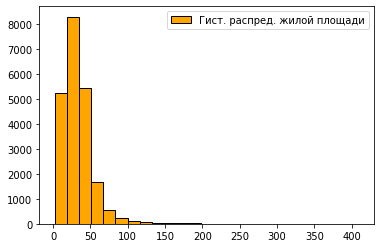

In [285]:
plt.hist(data['living_area'], bins=25, color='orange', alpha=1,  ec='black', label='Гист. распред. жилой площади')
plt.legend(loc='best')
plt.show()

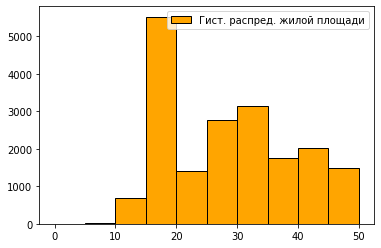

In [286]:
plt.hist(data['living_area'], range=(0,50), bins=10, color='orange', alpha=1,  ec='black', label='Гист. распред. жилой площади')
plt.legend(loc='best')
plt.show()

**График жилой площади квартир практически дублирует график выше, что логично, т.к. он отражает только жилую площадь недвижимости и смещен немного влево. более 18000 квартир из нашего исследования имеют жилую площадь менее 50$м^2$, при этом чаще всего площадь жилого помеещения 15-20$м^2$.**

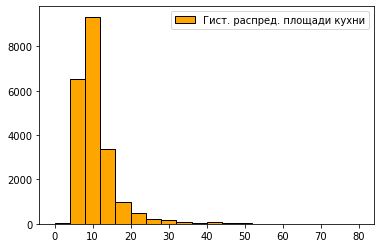

In [287]:
plt.hist(data['kitchen_area'], range=(0, 80),bins=20, color='orange', alpha=1,  ec='black', label='Гист. распред. площади кухни')
plt.legend(loc='best')
plt.show()

**Площадь кухонь в объявлениях, в подавляющем большенстве небольшая и находится в пределах от 5 до 15 $м^2$, при этом чаще всего встречаются предложения, где метраж кухни около 10 $м^2$. В датасете есть предложения с площадью кухонь от 40 $м^2$, сопоставимых по площади с небольшими квартирами. Имеющих возможность купить квартиру с такой большой кухней крайне мало, как и количество таких предложений.**

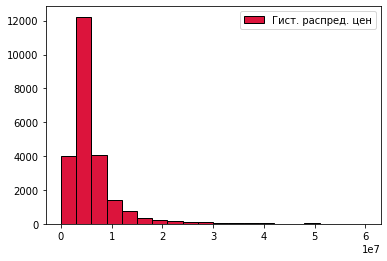

In [288]:
plt.hist(data['last_price'], range=(0,60000000),bins=20, color='crimson', alpha=1,  ec='black', label='Гист. распред. цен')
plt.legend(loc='best')
plt.show()

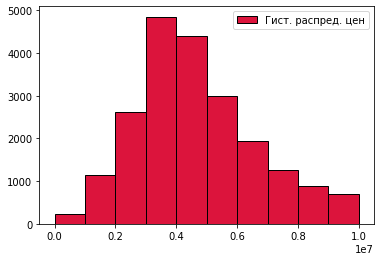

In [289]:
plt.hist(data['last_price'], range=(0,10000000),bins=10, color='crimson', alpha=1,  ec='black', label='Гист. распред. цен')
plt.legend(loc='best')
plt.show()

In [290]:
data['last_price'].describe()

count    2.369600e+04
mean     6.541416e+06
std      1.088754e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Большая часть предложений лежит в ценовом диапазоне от 2 млн. руб. до 6 млн. руб., медианное значение цены по которой предлагают квартиру - 4.65 млн. руб..**

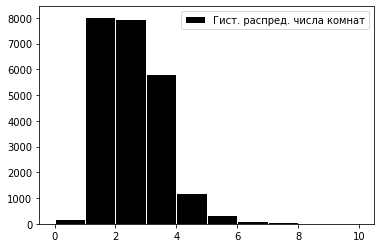

In [291]:
plt.hist(data['rooms'], range=(0,10),bins=10, color='black', alpha=1,  ec='white', label='Гист. распред. числа комнат')
plt.legend(loc='best')
plt.show()

In [292]:
data['rooms'].describe()

count    23696.000000
mean         2.070729
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**На рынке основная часть предложений представлена квартирами с 1, 2 и 3мя комнатами. Таких предложений более 90% от исследуемого объема предложений. Немного чаще в наиболее популярных предложениях встречаются квартиры с 1 и 2мя комнатами.**

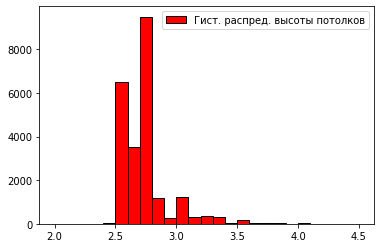

In [293]:
plt.hist(data['ceiling_height'], range=(2,4.5),bins=25, color='red', alpha=1,  ec='black', label='Гист. распред. высоты потолков')
plt.legend(loc='best')
plt.show()

In [294]:
data['ceiling_height'].describe()

count    23696.000000
mean         2.706901
std          0.282127
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

**Среди квартир наиболее часто встречаются предложения с высотой потолков 2.7 метра, при этом большая часть предложений приходятся на диапазон от 2.5 м. до 2.7 м. Более дорогие квартиры с более выскоими потолками встречаются гораздо реже и являются скорее исключением.**

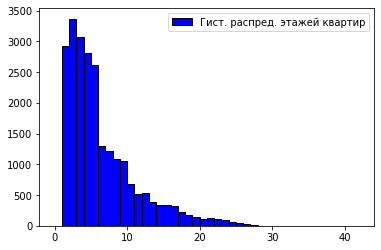

In [295]:
plt.hist(data['floor'], range=(0,42), bins=42, color='blue', alpha=1,  ec='black', label='Гист. распред. этажей квартир')
plt.legend(loc='best')
plt.show()

**Квартиры в невысотных домах продаются наиболее часто. Зачастую выкладываются объявления о продаже недвижимости, находящейся на 1-5 этажах. Скорее всего это связно с тем, что подавляющее большенство домов в объявлениях это пятиэтажки.**

In [296]:
data['floor'].sort_values().value_counts()

2     3368
3     3073
1     2917
4     2803
5     2620
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     177
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

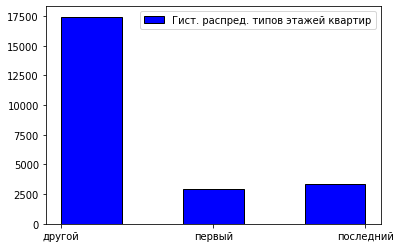

In [297]:
plt.hist(data['floor_category'], range=(0,2), bins=5, color='blue', alpha=1,  ec='black', label='Гист. распред. типов этажей квартир')
plt.legend(loc='best')
plt.show()

**На гистограмме видно, что доли продаж квартир на первом и последнем этажах приблизительно равны, основная часть приходится на квартиры находящиеся между первым и последним этажами.**

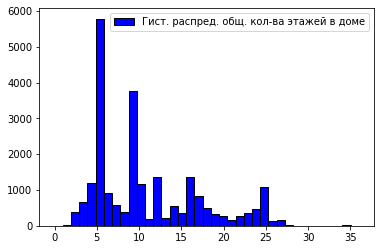

In [298]:
plt.hist(data['floors_total'], range=(0,36), bins=37, color='blue', alpha=1,  ec='black', label='Гист. распред. общ. кол-ва этажей в доме')
plt.legend(loc='best')
plt.show()

**На гистограмме можно наблюдать несколько явно выделяющихся пиков. Они говорят о том, что в городе и близ лежащих населенных пунктах наиболее популярный тип построек это пятиэтажки, девятиэтажки**

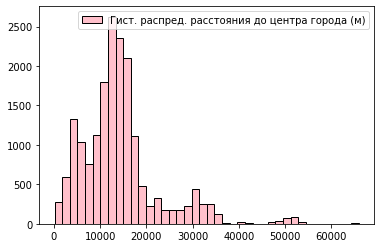

In [299]:
plt.hist(data['city_сenters_nearest'], bins=40, color='pink', alpha=1,  ec='black', label='Гист. распред. расстояния до центра города (м)')
plt.legend(loc='best')
plt.show()

In [300]:
data['city_сenters_nearest'].describe()

count    18302.000000
mean     14230.150366
std       8622.641449
min        181.000000
25%       9274.000000
50%      13101.000000
75%      16324.250000
max      65968.000000
Name: city_сenters_nearest, dtype: float64

**Чаще всего продают квартиры, которые находятся на удалении до 14 км. от центра города, реже все отсальные. Реже встречаются объявления о продаже недвижимости, которая находится на удалении более 14 км. от центра города.**

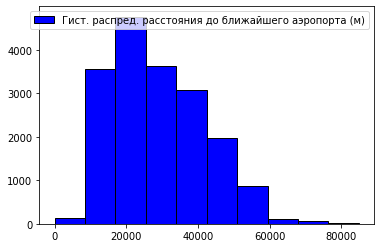

In [301]:
plt.hist(data['airports_nearest'], bins=10, color='blue', alpha=1,  ec='black', label='Гист. распред. расстояния до ближайшего аэропорта (м)')
plt.legend(loc='best')
plt.show()

**Аэропорт зачастую находится достаточно близко к недвижимости, выставленной на продажу. От большенства домов до аэропорта добираться не более 40 км. Наиболее часто на продажу выставляются квартиры находящиеся в радиусе 20 км. от аэропорта.**

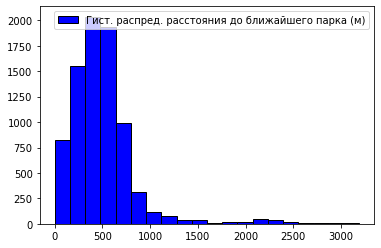

In [302]:
plt.hist(data['parks_nearest'], bins=20, color='blue', alpha=1,  ec='black', label='Гист. распред. расстояния до ближайшего парка (м)')
plt.legend(loc='best')
plt.show()

In [303]:
data['parks_nearest'].count()

8076

In [304]:
data['parks_nearest'].describe()

count    8076.000000
mean      490.818722
std       342.348085
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

**Информация о парках указана менее чем в четверти объявлениях о продаже недвижимости и там где наличие парков указано до них относительно недалеко добираться. Большинство парков лежит в радиусе 1 км., до самого дальнего придется добираться чуть больше 3 км.**

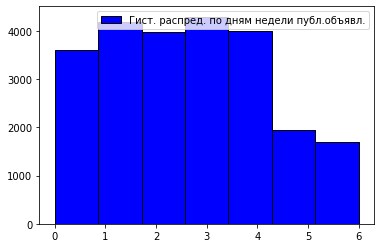

In [305]:
plt.hist(data['day_of_week_exp_number'], range=(0,6), bins=7, color='blue', alpha=1,  ec='black', label='Гист. распред. по дням недели публ.объявл.')
plt.legend(loc='best')
plt.show()

**Чаще всего объявления выкладываются во вторник и четверг, реже всего - субботу и воскресенье. Если снижение числа размещаемых объявлений в выходные можно объяснить тем, что на выходных люди занимаются своими делами, отдыхают, пытаются отвлечься от дел, то в будние дни не совсем понятно чем объясняется большее количество размеещний именно во вторник и четверг, но есть исследования по научной организации труда, которые говорят о том, что в эти дни люди наиболее продуктивные и у них находятся силы даже на размещение объявления!**

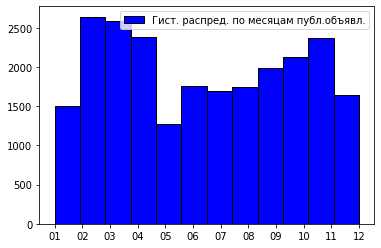

In [306]:
plt.hist(data['month_exposition'].sort_values(), range=(0,11), bins=12, color='blue', alpha=1,  ec='black', label='Гист. распред. по месяцам публ.объявл.')
plt.legend(loc='best')
plt.show()

**На полученной гистограмме явно видно, что наиболее часто выкладывались объявления в феврале, даже несмортя на то, что месяц короче остальных на 2-3 дня. Возможно, что это связано с повышением активности у людей после долгих январских выходных. Большой провал виден в мае, возможно также связано с большим числом выходных и тем, что люди проводят много времени на отдыхе, пытаясь не думать о делах. В летний период заметно плато, а с начала осени до ноября идет рост числа размещенных предложений. В декабре, перед новогодними праздниками, вплоть до февраля, идет спад числа публикаций.**

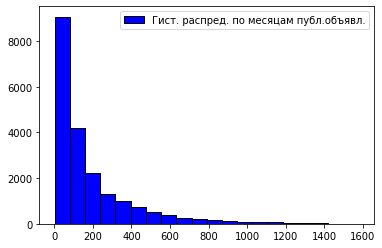

In [307]:
plt.hist(data['days_exposition'].sort_values(), bins=20, color='blue', alpha=1,  ec='black', label='Гист. распред. по месяцам публ.объявл.')
plt.legend(loc='best')
plt.show()

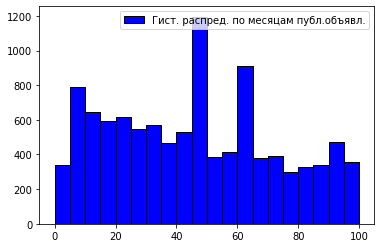

In [308]:
plt.hist(data['days_exposition'].sort_values(),range=(0,100), bins=20, color='blue', alpha=1,  ec='black', label='Гист. распред. по месяцам публ.объявл.')
plt.legend(loc='best')
plt.show()

In [309]:
data['days_exposition'].describe()

count    20515.000000
mean       180.903875
std        219.739074
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [310]:
data.agg({'days_exposition': ['mean', 'median']}).rename(columns={'days_exposition': 'Дней размещения на продаже'})

,Дней размещения на продаже
mean,180.903875
median,95.000000


**Из гистограммы видно, что для закрытия большенства объявлений требовалось менее 200 дней. Медианное значение показывает, что в большенстве своем объявления закрывались в районе 95 дней. Среднее значение в 2 раза больше медианного и равно приблизительно 181 дню. Это могло произойти из-за выбросов и значтиельного числа объявлений, которые провисели большое количесво времени, а это могло произойти из-за того, что недвижимость невостребована и её не могут продать уже не первый год, а также из-за того, что объявление банально могли забыть закрыть на площадке продажи. Однодневные объявления можно считать необычайно быстрыми, вероятно в них была допущена ошибка и они были удалены в этот же день, либо продавец просто-напросто передумал продавать квартиру, таких объявлений немного, порядка 300 штук.**

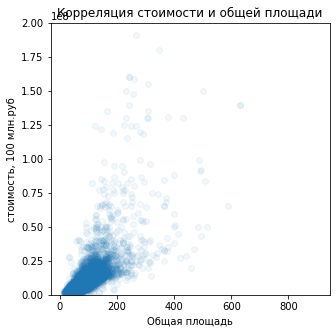

In [311]:
plt.figure(figsize=(5,5))
plt.scatter(data['total_area'], data['last_price'], alpha=0.06)
plt.xlabel('Общая площадь')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и общей площади')
plt.ylim(0, 200000000)
plt.show()

**В квартирах до 200 $м^2$ наблюдается прямая зависимость между общей площадью квартиры и её ценой. Положительная корреляция означает, что при увеличении площади квартиры цена на нее также будет расти. В квартирах с большей площадью эта зависимость уже не наблюдаются и цены на квартиры начинают сильно разниться.**

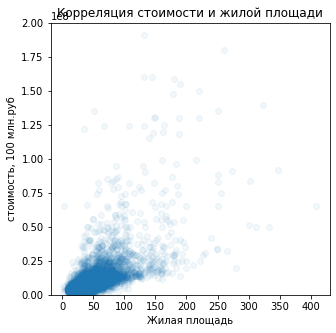

In [312]:
plt.figure(figsize=(5,5))
plt.scatter(data['living_area'], data['last_price'], alpha=0.06)
plt.xlabel('Жилая площадь')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и жилой площади')
plt.ylim(0, 200000000)
plt.show()

**Заметна положительная корреляция, т.е. рост цены связан с увеличением жилой площади, по крайней мере в квартирах с жилой площадью до 150 $м^2$ эта зависимость явно наблюдается.**

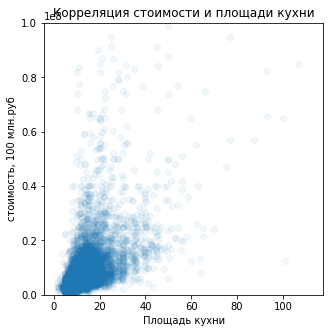

In [313]:
plt.figure(figsize=(5,5))
plt.scatter(data['kitchen_area'], data['last_price'], alpha=0.06)
plt.xlabel('Площадь кухни')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и площади кухни')
plt.ylim(0, 100000000)
plt.show()

**На этом графике наблюдается положительная линейнкая зависимость, с увеличением площади кухни, квартиры могут достаточно сильно подрасти в цене, особенно сильно эта зависимость прослеживается в квартирах с площадью кухонь до 40 $м^2$**

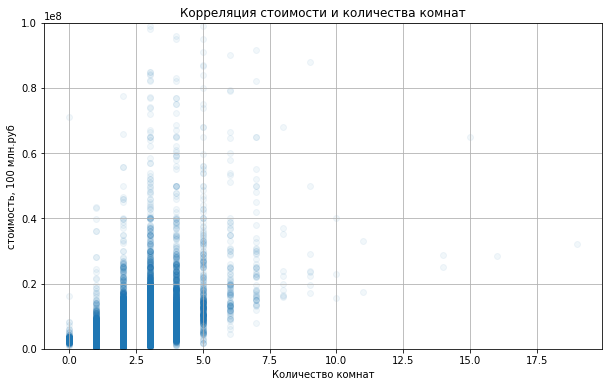

In [314]:
plt.figure(figsize=(10,6))
plt.scatter(data['rooms'], data['last_price'], alpha=0.06)
plt.xlabel('Количество комнат')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и количества комнат')
plt.ylim(0, 100000000)
plt.grid(True)
plt.show()

**На графике зависимости числа комнат от стоимости квартир видно, что основная часть данных о квартирах с числом комнат от 1 до 4. При этом стоимость квартир с числом комнат от 1 до 3 растет, от 3 до 4 - приблизительно одинаковая, а для  пятикомнатных квартир снижается, возможно потому, что квартиры находятся в домах старой постройки.**

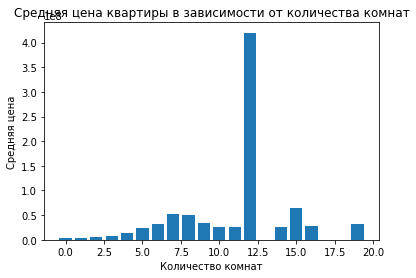

,mean,count,median
,last_price,last_price,last_price
rooms,,,
0,3.337724e+06,197,2700000
1,3.833956e+06,8045,3600000
2,5.591830e+06,7939,4770338
3,8.179119e+06,5814,6200000
4,1.342350e+07,1180,9000000
5,2.376208e+07,326,14000000
6,3.170975e+07,105,19000000
7,5.147007e+07,59,24900000


In [337]:
#ИСПРАВЛЕНИЕ V.1

mean_price_by_rooms = data.groupby('rooms')['last_price'].mean()
# Строим гистограмму
plt.bar(mean_price_by_rooms.index, mean_price_by_rooms.values)
# Называем оси и даем название графику
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от количества комнат')
# Отображаем график
plt.show()

data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

#ИСПРАВЛЕНИЕ V.1

**Из таблицы видно, что основная часть данных о квартирах с числом комнат от 1 до 4. При этом стоимость квартир с числом комнат от 1 до 4 растет, а для пятикомнатных и более квартир выборки нерепрезентативны и не отражают действительности.**

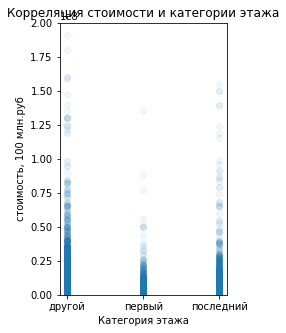

In [316]:
plt.figure(figsize=(3,5))
plt.scatter(data['floor_category'], data['last_price'], alpha=0.06)
plt.xlabel('Категория этажа')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и категории этажа')
plt.ylim(0,200000000)
plt.show()

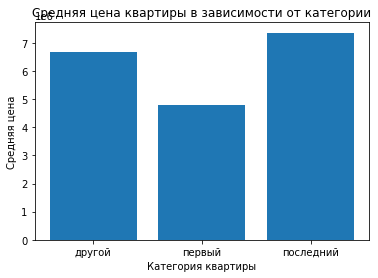

In [317]:
#ИСПРАВЛЕНИЕ V.1

mean_price_by_category = data.groupby('floor_category')['last_price'].mean()
# Строим гистограмму
plt.bar(mean_price_by_category.index, mean_price_by_category.values)
# Называем оси и даем название графику
plt.xlabel('Категория квартиры')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от категории')
# Отображаем график
plt.show()

In [318]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category

,mean,count,median
,last_price,last_price,last_price
floor_category,,,
другой,6.675764e+06,17444,4850000
первый,4.803560e+06,2917,3900000
последний,7.358734e+06,3335,4300000


**Стоимость квартир на последних этажах зачастую выше, чем на первых этажах, при этом на остальных этажах варирование стоимости квартир похоже на варирование стоимости на последнем этаже, но медианное значение стоимости на "других этажах" порядком отличется в большую сторону.**

#ИСПРАВЛЕНИЕ V.1

**Средняя стоимость квартир на последних этажах (7.36 млн.руб.) зачастую выше, чем на остальных этажах, при этом самые дешевые квартиры по статистике находятся на первом этаже (4.8 млн.руб.). Средняя стоимость на остальных этажах (6.68 млн.руб.) находится между средними стоимостями квартир на первом и последнем этажах.**

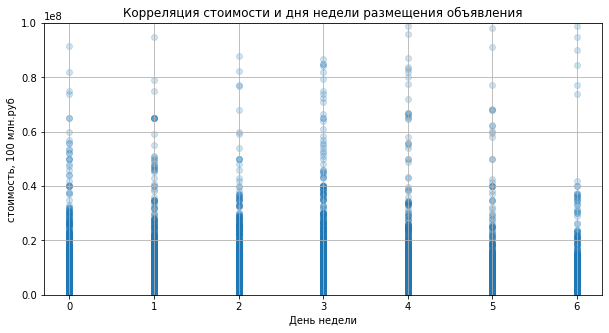

In [319]:
plt.figure(figsize=(10,5))
plt.scatter(data['day_of_week_exp_number'], data['last_price'], alpha=0.20)
plt.xlabel('День недели')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и дня недели размещения объявления')
plt.ylim(0,100000000)
plt.grid(True)
plt.show()

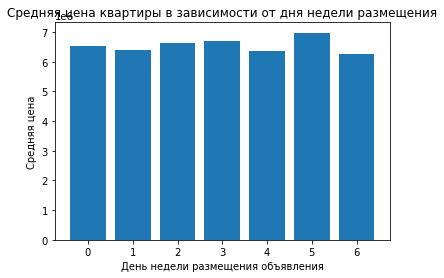

day_of_week_exp_number
0    3611
1    4183
2    3973
3    4294
4    4000
5    1936
6    1699
dtype: int64

In [320]:
mean_price_by_exp_number = data.groupby('day_of_week_exp_number')['last_price'].mean()
# Строим гистограмму
plt.bar(mean_price_by_exp_number.index, mean_price_by_exp_number.values)
# Называем оси и даем название графику
plt.xlabel('День недели размещения объявления')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от дня недели размещения')
# Отображаем график
plt.show()

data.groupby('day_of_week_exp_number').size()

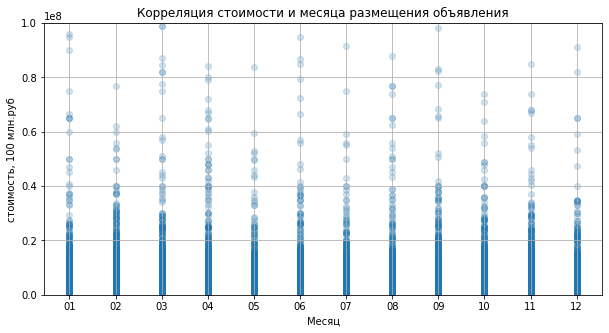

In [321]:
plt.figure(figsize=(10,5))
plt.scatter(data['month_exposition'].sort_values(), data['last_price'], alpha=0.2)
plt.xlabel('Месяц')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и месяца размещения объявления')
plt.ylim(0,100000000)
plt.grid(True)
plt.show()

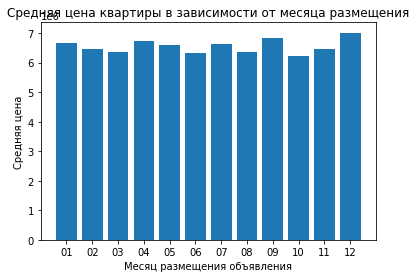

,mean,count,median
,last_price,last_price,last_price
month_exposition,,,
01,6.668233e+06,1500,4600000
02,6.468500e+06,2640,4650000
03,6.359275e+06,2587,4650000
04,6.737198e+06,2379,4800000
05,6.600435e+06,1274,4515000
06,6.311696e+06,1759,4400000
07,6.644408e+06,1694,4650000
08,6.350233e+06,1744,4570000


In [334]:
mean_price_by_exp_month = data.groupby('month_exposition')['last_price'].mean()
# Строим гистограмму
plt.bar(mean_price_by_exp_month.index, mean_price_by_exp_month.values)
# Называем оси и даем название графику
plt.xlabel('Месяц размещения объявления')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от месяца размещения')
# Отображаем график
plt.show()

data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

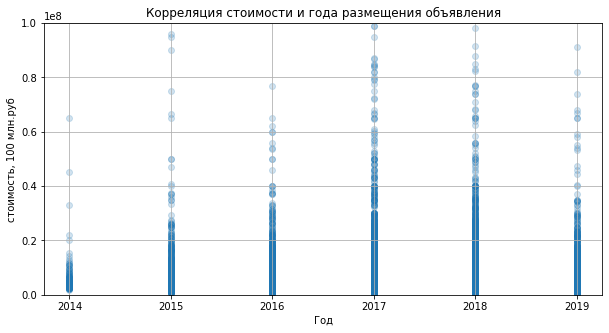

In [338]:
plt.figure(figsize=(10,5))
plt.scatter(data['year_exposition'].sort_values(), data['last_price'], alpha=0.2)
plt.xlabel('Год')
plt.ylabel('стоимость, 100 млн.руб')
plt.title('Корреляция стоимости и года размещения объявления')
plt.ylim(0,100000000)
plt.grid(True)
plt.show()

**Из графиков и таблиц видно, что день недели и месяц размещения никак не влияют на стоимость недвижимости.**

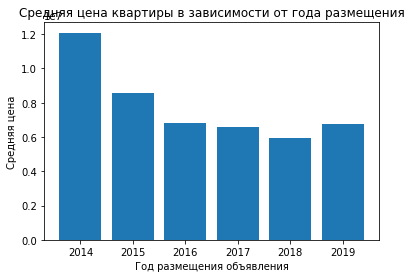

,mean,count,median
,last_price,last_price,last_price
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2016,6.827912e+06,2783,4550000
2017,6.585729e+06,8190,4500000
2018,5.950388e+06,8516,4550000
2019,6.782388e+06,2879,5050000


In [335]:
mean_price_by_exp_year = data.groupby('year_exposition')['last_price'].mean()
# Строим гистограмму
plt.bar(mean_price_by_exp_year.index, mean_price_by_exp_year.values)
# Называем оси и даем название графику
plt.xlabel('Год размещения объявления')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от года размещения')
# Отображаем график
plt.show()

data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

**Из графика, а также сводной таблицы видно, что с 2016 года стоимость жилья средняя и медианная лишь незначительно варировалась, из чего можно заключить, что год размещения на стоимость недвижимости не влияет.**

In [325]:
#Выведем топ10 населенных пунктов с нибольшим числом объявлений и сохраним эти данные в переменной
localities_top_10 = data['locality_name_new'].sort_values().value_counts().head(10)
localities_top_10

санкт-петербург      15719
поселок мурино         590
кудрово                472
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
выборг                 237
Name: locality_name_new, dtype: int64

In [326]:
#Выведем среднюю цену за квадратный метр по топ10 населенным пунктам
localities_top_10_pivot = data.query('locality_name_new in @localities_top_10.index').pivot_table(index='locality_name_new', values='price_sq_m').sort_values(by='price_sq_m', ascending=True)
localities_top_10_pivot

,price_sq_m
locality_name_new,
выборг,58141.909325
всеволожск,68654.473970
гатчина,68746.146515
колпино,75424.579112
поселок шушары,78677.364318
поселок мурино,86087.512017
поселок парголово,90175.913089
кудрово,95324.930508
пушкин,103125.819377


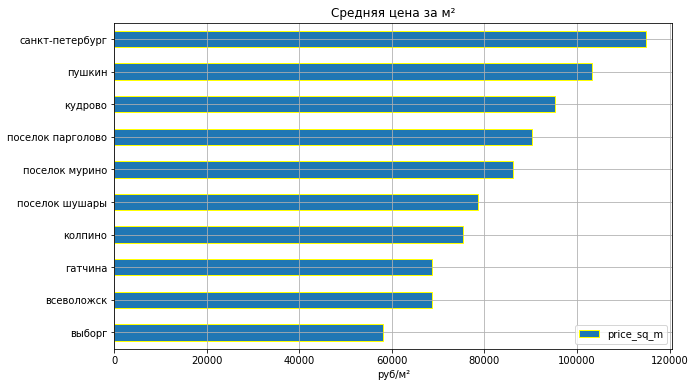

In [327]:
#Выведем табличные данные в гистограмме
localities_top_10_pivot.plot(kind='barh', legend=True, grid=True, ec='yellow', figsize=(10, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

**Квартиры с самой высокой стоимостью за $м^2$ в Санкт-Петербурге и Пушкине, там средняя стоимость за квадрат более 100000 рублей. Самая низкая стоимость в топ10 населенных пунктов по количеству объявлений в Выборге, там квартиру можно найти в среднем по стоимости чуть ниже 60000 за квадрат.**

In [328]:
locality_price_spb = data[data['locality_name_new'] == 'санкт-петербург']
locality_price_spb.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_new,price_sq_m,day_of_week_exp,day_of_week_exp_number,month_exposition,year_exposition,floor_category,city_сenters_nearest_km
12372,10,8900000,70.2,2019-03-13,2,2.90,22.0,30.0,22,False,...,923.0,NaN,санкт-петербург,126780.63,Wednesday,2,03,2019,последний,12.0
16207,14,10500000,76.6,2018-02-01,2,2.70,16.0,37.0,12,False,...,372.0,40.0,санкт-петербург,137075.72,Thursday,3,02,2018,другой,8.0
3922,20,7200000,54.0,2018-07-09,2,3.30,7.0,34.2,5,False,...,NaN,3.0,санкт-петербург,133333.33,Monday,0,07,2018,другой,5.0
17717,13,4300000,41.9,2015-07-30,1,2.70,19.0,20.4,14,False,...,NaN,836.0,санкт-петербург,102625.30,Thursday,3,07,2015,другой,12.0
18210,12,12700000,84.8,2017-06-14,2,3.02,5.0,45.9,1,False,...,NaN,604.0,санкт-петербург,149764.15,Wednesday,2,06,2017,первый,11.0


In [329]:
len(locality_price_spb)

15719


**В датасете 15719 объявлений по Санкт-Петербургу. Построим график зависимости средней цены недвижимости каждого километра удаленности от центра СП.**

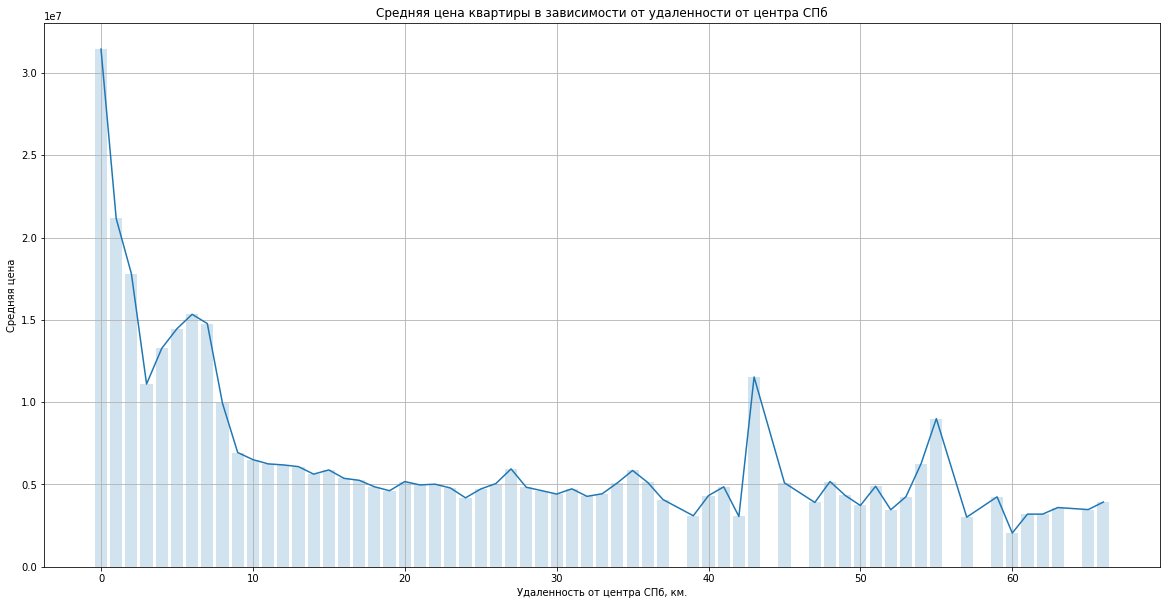

,mean,count,median
,last_price,last_price,last_price
city_сenters_nearest_km,,,
0.0,3.144912e+07,27,17900000
1.0,2.115871e+07,193,11490000
2.0,1.780829e+07,311,10000000
3.0,1.110271e+07,352,8409000
4.0,1.327061e+07,696,9200000
...,...,...,...
61.0,3.200000e+06,1,3200000
62.0,3.200000e+06,1,3200000


In [351]:

mean_price_by_spb_nearest_km = data.groupby('city_сenters_nearest_km')['last_price'].mean()
# Строим линейчатую диаграмму
mean_price_by_spb_nearest_km.plot(kind='line', figsize=(20,10))
plt.bar(mean_price_by_spb_nearest_km.index, mean_price_by_spb_nearest_km.values, alpha=0.2)
# Называем оси и даем название графику
plt.xlabel('Удаленность от центра СПб, км.')
plt.ylabel('Средняя цена')
plt.title('Средняя цена квартиры в зависимости от удаленности от центра СПб')
plt.grid(True)
# Отображаем график
plt.show()

data.pivot_table(index = 'city_сenters_nearest_km', values = 'last_price', aggfunc = ['mean', 'count', 'median'])

**Видно, что в пределах первых 5 км. от центра города средняя стоимость недвижимости резко растет с приближением к отметке в 30 млн.р. в самом центре Санкт-Петербурга. При этом плавный, практически линейный график снижения средней стоимости виден в радиусе от 5 до 10 км. и от 10 до 66 км. Также на графике присутствует три явных пика на 7 км. от центра города, на 43 и 55 км. Возможно квартиры находятся в элитных домах или новостройках, или недалеко от исторических памятников/мест.**

### Общий вывод

Проанализировав данные у нас сложилась картинка о среднестатистической квартире размещенной на продажу:
- квартира общей площадью около 45 м.;
- кухней от 5 до 10 м.;
- с 1 или 2 комнатами;
- высота потолков около 2.7 м.;
- медианное значение стоимости - 4.65 млн. руб.;
- квартира находится в 5-ти или 9-ти этажке;
- расположена на уровне 1-5 этажа;
- расположена на удалении до 14 км. от центра города;
- до аэропорта около 20 км.;
- парка рядом с домом либо нет, либо находится в радиусе 1 км.

В ходе исследования выявлено:
- чаще всего объявления выкладываются во вторник и четверг, реже всего - субботу и воскресенье;
- наиболее часто выкладывались объявления в феврале. Май, декабрь и январь наиболее спокойные месяцы, объявлений выкладывается меньше;
- для закрытия большенства объявлений требовалось менее 200 дней, но в большенстве своем объявления закрывались в районе 95 дней.
- в пределах первых 5 км. от центра города средняя стоимость недвижимости резко растет с приближением к отметке в 30 млн.р. в самом центре Санкт-Петербурга. При этом плавный, практически линейный график снижения средней стоимости виден в радиусе от 5 до 10 км. и от 10 до 66 км. Также на графике присутствует три явных пика на 7 км. от центра города, на 43 и 55 км. Возможно квартиры находятся в элитных домах или новостройках, или недалеко от исторических памятников/мест
- cтоимость квартир на последних этажах зачастую выше, чем на первых этажах, но медианное значение стоимости на "других этажах" порядком отличется в большую сторону;
- день недели и месяц размещения никак не влияют на стоимость недвижимости, также как и год.
- больше всего на стоимость квартиры влияет её площадь, также на стоимость влияет количество комнат в квартире. В обоих случаях прямая положительная зависимость: с ростом площади и числа комнат растет и стоимость;
- дата размещения объявления никак не влияет на стоимость недвижимости.

Было достаточно много пропусков в столбцах, связанных с геоданными, возможно имеются какие-то технические проблемы при формировании данных или при выгрузке. Также пропуски были замечены в полях с отметкой об аппартаментах, связанных с числом балконов, высотой потолков их причину появления также стоит проверить дополнительно.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод